# Using Eradiate to visualize the effects of an atmosphere

Using the rayleigh solver we can compute and visualize the effects of an atmosphere over a non isotropically scattering surface.
We simulate a quasi one dimensional scenario with a surface employing the `RPV` scattering model 
covered by a purely rayleigh scattering atmospher eof different scattering cross section.

Eventually we create a series of plots with Eradiate's visualization facilities to qualitatively assert the effect of the scattering cross section on ToA leaving radiance.

## Imports

### Non Eradiate libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Eradiate kernel and variant

In [1]:
import eradiate.kernel
eradiate.kernel.set_variant("scalar_mono_double")

### Solver and scene building facilities

In [ ]:
# The OneDimSolver
from eradiate.solvers.onedim import OneDimSolver


from eradiate.scenes import SceneDict
from eradiate.scenes.lithosphere import RPV
from eradiate.scenes.atmosphere import RayleighHomogeneous
from eradiate.scenes.illumination import Directional

In [4]:
sigmas = [1e-3, 5e-3, 1e-2, 5e-2, 1e-1]

results = list()
for sigma in sigmas:
    solver = OneDimSolver(SceneDict.empty().add([
        RPV({
            "type": "rpv",
            "width": 200
        }),
        RayleighHomogeneous({
            "sigma_s": sigma,
            "height": 40.,
            "width": 200.
        }),
        Directional({
            "zenith": 30.,
            "azimuth": 0.,
            "irradiance": 1.0e+6
        }),
        {"integrator": {"type": "volpathmis"}}
    ]))
    zenith_grid = np.arange(0., 90., 10.)
    azimuth_grid = np.arange(0., 360.1, 10.)

    results.append(solver.run(
        vza=zenith_grid, 
        vaa=azimuth_grid,
        spp=1024
    ))

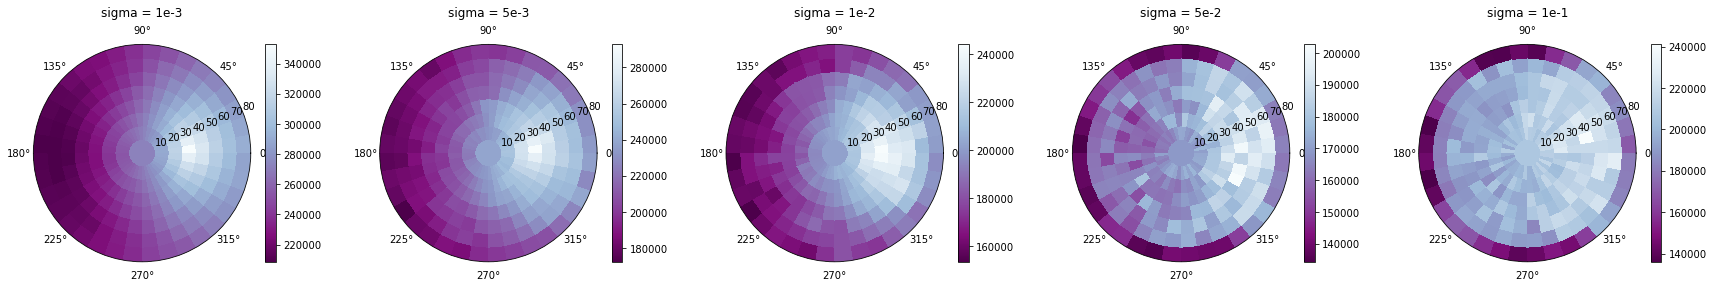

In [5]:
fig, axs = plt.subplots(1, 5, figsize=(30, 4), subplot_kw=dict(projection='polar'))

r, theta = np.meshgrid(zenith_grid, np.radians(azimuth_grid))
pcm0 = axs[0].pcolormesh(theta, r, np.transpose(results[0]), cmap="BuPu_r")
plt.colorbar(pcm0, ax=axs[0])
pcm1 = axs[1].pcolormesh(theta, r, np.transpose(results[1]), cmap="BuPu_r")
plt.colorbar(pcm1, ax=axs[1])
pcm2 = axs[2].pcolormesh(theta, r, np.transpose(results[2]), cmap="BuPu_r")
plt.colorbar(pcm2, ax=axs[2])
pcm3 = axs[3].pcolormesh(theta, r, np.transpose(results[3]), cmap="BuPu_r")
plt.colorbar(pcm3, ax=axs[3])
pcm4 = axs[4].pcolormesh(theta, r, np.transpose(results[4]), cmap="BuPu_r") 
plt.colorbar(pcm4, ax=axs[4])

axs[0].set_title("sigma = 1e-3", y=1.1)
axs[1].set_title("sigma = 5e-3", y=1.1)
axs[2].set_title("sigma = 1e-2", y=1.1)
axs[3].set_title("sigma = 5e-2", y=1.1)
axs[4].set_title("sigma = 1e-1", y=1.1)
plt.show()
plt.close()
